f(u, param, t) = SVector(d²ｘ/dt², dx/dt), where d²ｘ/dt² = -ω²*x,  u = SVector(dx/dt, x)


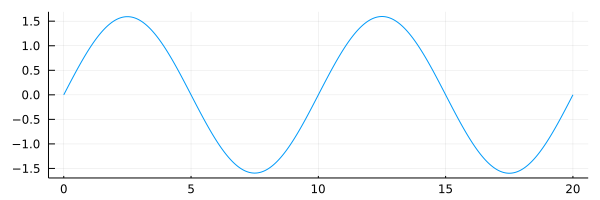

In [1]:
using Plots
using StaticArrays

ω = 2π/10
param = (; ω)
u0 = SVector(1.0, 0.0)
tspan = (0.0, 4π/ω)

"""
f(u, param, t) = SVector(d²ｘ/dt², dx/dt), where d²ｘ/dt² = -ω²*x,  u = SVector(dx/dt, x)
"""
function f(u::SVector, param, t)
    ω = param.ω
    v, x = u
    SVector(-ω^2*x, v)
end

display(@doc f)

function euler(f, u0, tspan, param, dt = 1e-3)
    t = range(tspan[1], tspan[2] + 0.999*dt; step = dt)
    u = similar([u0], length(t))
    u[begin] = u0
    for i in eachindex(t)[begin:end-1]
        u[i+1] = u[i] + f(u[i], param, t[i])*dt
    end
    prob = (; f, u0, tspan, param, dt)
    sol = (; t, u, prob)
end

sol = euler(f, u0, tspan, param)

function val(sol, t)
    u = sol.u
    a, b = extrema(sol.t)
    dt = step(sol.t)
    
    k_float, r = fldmod(t - a, dt)
    k = firstindex(u) + Int(k_float) 
    
    k < firstindex(u) && return u[begin]
    k ≥ lastindex(u)  && return u[end]
    u[k] + r/dt * (u[k+1] - u[k])
end

val(sol, t, i) = val(sol, t)[i]

t = range(extrema(sol.t)...; length=1001)
y = val.(Ref(sol), t, 2)
plot(t, y; label="", size=(600, 200))

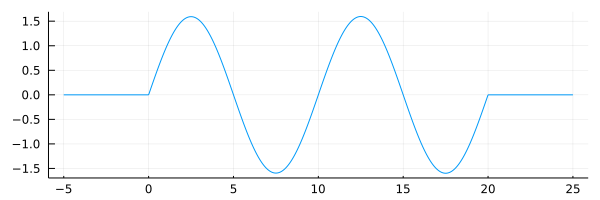

In [2]:
t = range(sol.t[begin]-5, sol.t[end]+5; length=1001)
y = val.(Ref(sol), t, 2)
plot(t, y; label="", size=(600, 200))